# Tarea 1

In [1]:
from numpy import *
from matplotlib.pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Ejercicio 1

### Método de Euler

Considerando la ecuación diferencial siguiente
$$y'(x) = f(x,y)$$
Podemos tomar
$$\int_{x_n}^{x_{n+1}} y'(x) dx = \int_{x_n}^{x_{n+1}}f(x,y) dx$$
Por lo tanto
$$y(x_{n+1}) = y(x_n) +\int_{x_n}^{x_{n+1}}f(x,y) dx$$
Expresando a $f(x,y)$ como su serie de Taylor tenemos
$$f(x,y) = f(x_0,y_n) + \sum_{m=1}^\infty \frac{f^{(m)}(x_0,y_n)}{m!} (x_n-x_0)^m $$

A primer orden se puede aproximar a 
$$f(x,y) \approx f(x_0,y_n)$$

Por lo tanto reescribimos como
$$y(x_{n+1}) \approx y(x_n) + hf(x_0,y_n) + O(h^2)$$

Donde $h = x_{n+1}-x_{n}$, suponiendo un espaciamiento uniforme a lo largo de x.

El método de Euler es por tanto
$$y(x_{n+1}) \approx y(x_n) + hf(x_0,y_n) + O(h^2)$$

In [2]:
def euler(funcion, p_ini, x, h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*funcion(y[i], tiempos[i])
    return tiempos, y

### Método de integración por serie de Taylor de 2º orden

Para el caso del método de Taylor de 2º orden se toma el siguiente orden el la expansión de Taylor de $f(x,y)$

$$f(x,y) \approx f(x_0,y_n) + h\frac{d}{dx}f(x_n,y_n) + O(h^2)$$

Pero $$\frac{d}{dx}f(x_n,y_n) = \left(\frac{\partial f(x_n,y_n)}{\partial x} + \frac{\partial f(x_n,y_n)}{\partial y} f(x_n,y_n)\right)$$
Por lo tanto 

$$f(x,y) \approx f(x_0,y_n) + h\left(\frac{\partial f(x_n,y_n)}{\partial x} + \frac{\partial f(x_n,y_n)}{\partial y} f(x_n,y_n)\right) +  O(h^2)$$

Por lo que integrando $f(x,y)$ tenemos
$$y(x_{n+1}) \approx y(x_n) + hf(x_n,y_n) + \frac{h^2}{2}\left(\frac{\partial f(x_n,y_n)}{\partial x} + \frac{\partial f(x_n,y_n)}{\partial y} f(x_n,y_n)\right) + O(h^3)$$

Notemos que cuando es un problema de mayor dimencionalidad en lugar de $\frac{\partial f(x_n,y_n)}{\partial y}$ se utiliza el jacobiano, $J_f(y, x)$. Puesta la expresión anterior para el caso de varias dimensiones se tiene

$$\vec y(x_{n+1}) \approx \vec y(x_n) + h\vec f(x_n,y_n) + \frac{h^2}{2}\left(\frac{\partial \vec f(x_n,y_n)}{\partial x} + J_f(y, x) \cdot \vec f(x_n,y_n)\right) + O(h^3)$$

In [3]:
def taylor2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): #xrange ocupa menos memoria para cualquier for que valga mas de 100
        f = ec(sol[i,:],tiempos[i])
        df,jac = d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

### Método de integración de Runge-Kutta de 2º orden

In [4]:
def RK2(ec, p_ini, x, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:] = sol[i,:]+h*f
    return tiempos,sol

### Método de integración de Runge-Kutta de 4º orden

In [5]:
def RK4(ec, p_ini, x, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

### Resolviendo un problema particular

Se tiene la siguiente ecuación diferencial que se quiere resolver

\begin{equation}
\ddot x + 0.5\dot x + \sin x = e^{-t}\sin 3t
\end{equation}
Con condiciones iniciales $x(0)=0$ y $\dot x(0)=1$

Que se puede reescribir como un sistema de dos ecuaciones diferenciales de primer orden

\begin{array}\\
\dot x &=& y\\
\dot y &=& -0.5y - \sin x + e^{-t}\sin 3t
\end{array}

Con condiciones iniciales $x(0)=0$ y $y(0)=1$

Como en este caso tenemos un sistema de dos ecuaciones el jacobiano del sistema es
$$
J(x,y) = 
\begin{pmatrix} 
0 & 1 \\ 
-cos(x) & -0.5
\end{pmatrix}
$$

In [6]:
def ecdif1(x, t):
    X_prime = x[1]
    Y_prime = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array([X_prime, Y_prime])

def decdif1(x,t):
    return array([0, (3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(x[0]),-0.5]])

### Comparación entre los métodos

Se define una funcion que facilita la visualización de las soluciones

In [7]:
def Visualiza_1(t_euler, sol_euler, t_taylor, sol_taylor, t_rk2, sol_rk2, t_rk4, sol_rk4, h):
    fig = plt.figure(figsize=(14,17))

    ax = fig.add_subplot(321)
    bx = fig.add_subplot(322)
    cx = fig.add_subplot(323)
    dx = fig.add_subplot(324)
    ex = fig.add_subplot(325)
    fx = fig.add_subplot(326)

    ax.plot(t_euler, sol_euler[:,0], label="Euler")
    bx.plot(t_taylor, sol_taylor[:,0], label="Taylor2")
    cx.plot(t_rk2, sol_rk2[:,0], label="RK2")
    dx.plot(t_rk4, sol_rk4[:,0], label="RK4")

    ax.set_title(u"Solución con el método de Euler", fontsize = 14)
    ax.set_xlabel("$t$",  fontsize = 16)
    ax.set_ylabel("$x(t)$",  fontsize = 16)
    ax.grid(True)

    bx.set_title(u"Solución con el método de Taylor", fontsize = 14)
    bx.set_xlabel("$t$",  fontsize = 16)
    bx.set_ylabel("$x(t)$",  fontsize = 16)
    bx.grid(True)

    cx.set_title(u"Solución con el método de Runge-Kutta de orden 2", fontsize = 14)
    cx.set_xlabel("$t$",  fontsize = 16)
    cx.set_ylabel("$x(t)$",  fontsize = 16)
    cx.grid(True)

    dx.set_title(u"Solución con el método de Runge-Kutta de orden 4", fontsize = 14)
    dx.set_xlabel("$t$",  fontsize = 16)
    dx.set_ylabel("$x(t)$",  fontsize = 16)
    dx.grid(True)
    
    ex.plot(t_euler, sol_euler[:,0], label="Euler")
    ex.plot(t_taylor, sol_taylor[:,0], label="Taylor2")
    ex.plot(t_rk2, sol_rk2[:,0], label="RK2")
    ex.plot(t_rk4, sol_rk4[:,0], label="RK4")
    ex.set_xlabel("$t$",  fontsize = 16)
    ex.set_ylabel("$x(t)$",  fontsize = 16)
    ex.set_title(u"Comparación de los métodos en el tiempo, con h="+str(h), fontsize = 14)
    ex.legend(loc='best')
    ex.grid(True)

    fx.plot(sol_euler[:,0], sol_euler[:,1], label="Euler")
    fx.plot(sol_taylor[:,0], sol_taylor[:,1], label="Taylor2")
    fx.plot(sol_rk2[:,0], sol_rk2[:,1], label="RK2")
    fx.plot(sol_rk4[:,0], sol_rk4[:,1], label="RK4")
    fx.set_xlabel("$x(t)$", fontsize = 16)
    fx.set_ylabel("$\dot x(t)$", fontsize = 16)
    fx.set_title(u"Comparación de los métodos en el espacio fase, con h="+str(h), fontsize = 14)
    fx.legend(loc='best')
    fx.grid(True);

#### Para h = 0.1

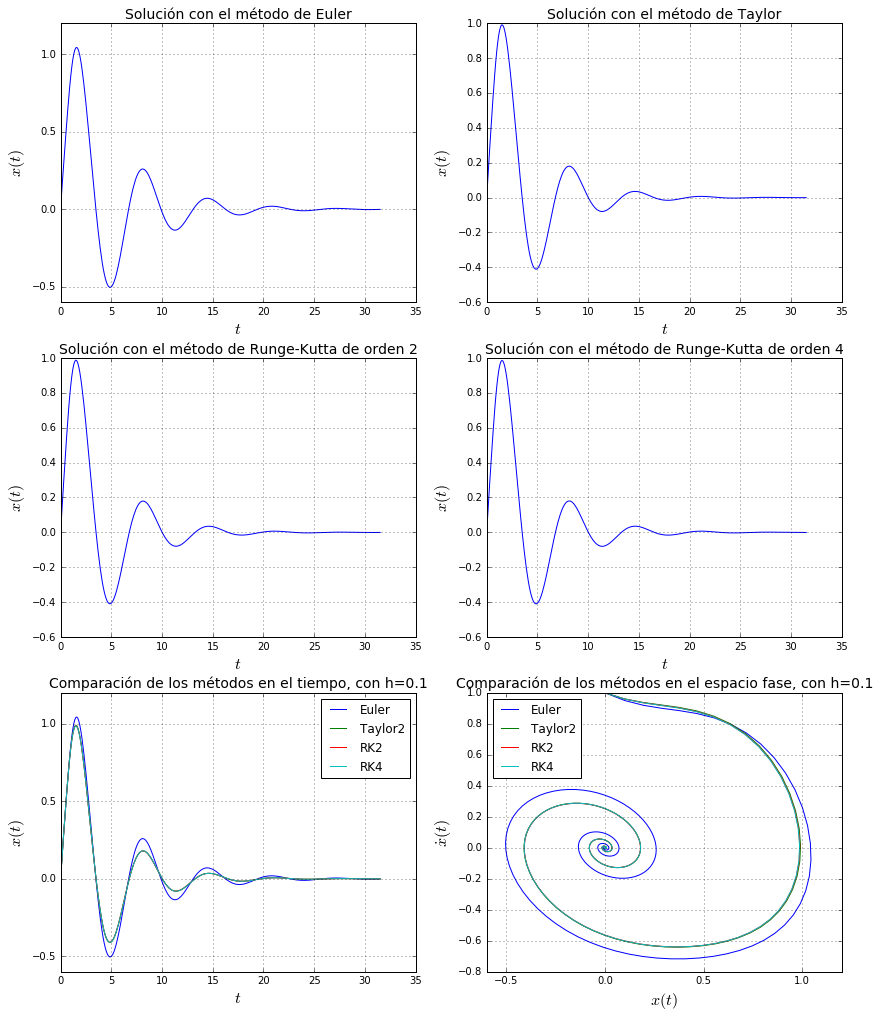

In [8]:
t_euler, sol_euler = euler(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-1)
t_taylor, sol_taylor = taylor2(ecdif1,decdif1,array([0.0, 1.0]), [0, 10*pi], 1.0e-1)
t_rk2, sol_rk2 = RK2(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-1)
t_rk4, sol_rk4 = RK4(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-1)

Visualiza_1(t_euler, sol_euler, t_taylor, sol_taylor, t_rk2, sol_rk2, t_rk4, sol_rk4, 0.1)

#### h = 0.01

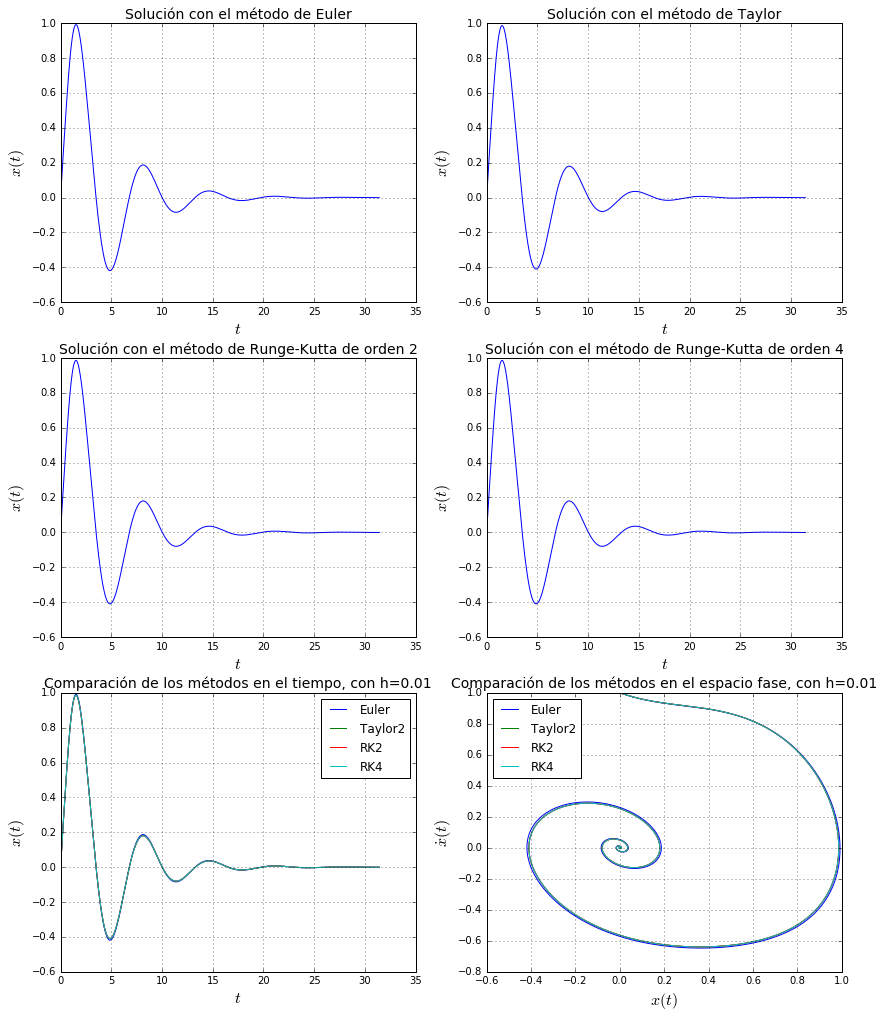

In [9]:
t_euler, sol_euler = euler(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-2)
t_taylor, sol_taylor = taylor2(ecdif1,decdif1,array([0.0, 1.0]), [0, 10*pi], 1.0e-2)
t_rk2, sol_rk2 = RK2(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-2)
t_rk4, sol_rk4 = RK4(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-2)

Visualiza_1(t_euler, sol_euler, t_taylor, sol_taylor, t_rk2, sol_rk2, t_rk4, sol_rk4, 0.01)

## Ejercicio 2

Consideremos la ecuacion 
$$ \dddot y +\ddot y^2-3 \dot y^3 +\cos^2 y = e^{-t} \sin 3t$$

Con las condiciones iniciales $\ddot y(1)=1$, $\dot y(1)=2$ y $y(1)=1$ para $t \in [1,2]$ y $t \in [1,2.1]$


Notemos que se puede descomponer el problema en un sistema de tres ecuaciones diferenciales de primer orden como

\begin{array}\\
\dot y &=& u\\
\dot u &=& v\\
\dot v &=& e^{-t} \sin 3t - v^2 + 3u^3 +cos^2 y
\end{array}

Con las condiciones iniciales $v(1)=1$, $u(1)=2$ y $y(1)=1$ para $t \in [1,2]$ y $t \in [1,2.1]$

Como en este caso tenemos un sistema de tres ecuaciones el jacobiano del sistema es
$$
J(x,y, u, v) = 
\begin{pmatrix} 
0 & 1 & 0 \\
0 & 0 & 1 \\
\sin 2y & 9u^2 & -2v
\end{pmatrix}
$$

In [10]:
def euler_last(funcion, p_ini, x, h=0.01):
    y_n = p_ini
    N = int((x[1]-x[0])/h)
    for i in xrange(N):
        y_n = y_n + h*funcion(y_n, (1.0*i)/N + x[0])
    return N, y_n

def taylor2_last(ec,d_ec,p_ini,x,h=0.1):
    y_n = p_ini
    N = int((x[1]-x[0])/h)
    for i in xrange(N):
        f = ec(y_n,(1.0*i)/N + x[0])
        df,jac = d_ec(y_n,(1.0*i)/N + x[0])
        y_n = y_n+h*f+(0.5*h*h*(df+dot(jac,f)))
    return N, y_n

def RK2_last(ec, p_ini, x, h=0.1):
    y_n = p_ini
    N = int((x[1]-x[0])/h)
    for i in xrange(N): 
        k = h*ec(y_n, (1.0*i)/N + x[0])
        f = ec(y_n+0.5*k,(1.0*i)/N + x[0]+0.5*h)
        y_n = y_n+h*f
    return N, y_n

def RK4_last(ec, p_ini, x, h=0.1):
    y_n = p_ini
    N = int((x[1]-x[0])/h)
    for i in xrange(N): 
        k1 = ec(y_n,(1.0*i)/N + x[0])
        k2 = ec(y_n+0.5*h*k1,(1.0*i)/N + x[0]+0.5*h)
        k3 = ec(y_n+0.5*h*k2,(1.0*i)/N + x[0]+0.5*h)
        k4 = ec(y_n+h*k3,(1.0*i)/N + x[0]+h)
        y_n = y_n + h*(k1+2*k2+2*k3+k4)/6
    return N, y_n

In [11]:
def ecdif2(x, t):
    Y_prime = x[1]
    Y_dobleprime = x[2]
    T_tripleprime = exp(-t)*sin(3*t) - x[2]*x[2] + 3*x[1]*x[1]*x[1]+cos(x[0])*cos(x[0])
    return array([Y_prime, Y_dobleprime, T_tripleprime])

def d_ecdif2(x, t):
    return array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1,0], [0,0,1], [sin(2*x[0]),9*x[1]*x[1],-2*x[2]]])

In [12]:
print euler_last(ecdif2, array([1.0, 2.0, 1.0]), [1., 2.], 1e-1)

(10, array([   7.29563627,   30.47384912,  817.05165759]))


In [13]:
print taylor2_last(ecdif2, d_ecdif2, array([1.0, 2.0, 1.0]), [1., 2.], 1e-1)

(10, array([  2.18980050e+07,  -9.65113225e+16,   8.46469145e+26]))


In [14]:
print RK2_last(ecdif2, array([1.0, 2.0, 1.0]), [1., 2.], 1e-1)

(10, array([ -7.65772460e+10,  -1.17281116e+24,  -1.37548601e+49]))


In [15]:
print RK4_last(ecdif2, array([1.0, 2.0, 1.0]), [1., 2.], 1e-1)

(10, array([ nan,  nan,  nan]))


/Users/diego/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/Users/diego/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in cos


## Ejercicio 3

Se define una funcion que facilita la visualización de las soluciones

In [16]:
def Visualiza_3(Metodo, t_soluciones, soluciones, omega, Tmax, h, graph, ax, legd=[0,"",'r','.']):
    amplitud = []
    for i in range(len(omega)):
        if graph==1:
            ax.plot(t_soluciones[i], soluciones[i][:,0], label="$\omega =$"+str(omega[i]))
        else:
            amplitud.append([soluciones[i][j,0]*soluciones[i][j,0] for j in range(len(soluciones[i][:,0]))])

    if graph!=1:
        norma = zeros(len(omega))
        for i in range(len(omega)):
            for j in range(len(amplitud[i])):
                norma[i] += amplitud[i][j]
            norma[i] = norma[i]*h
    
    if graph==1:
        ax.set_xlabel("$t$",  fontsize = 16)
        ax.set_ylabel("$x(t)$",  fontsize = 16)
        ax.set_title(u"Soluciones para distintos valores de $\omega$ con el método de "+Metodo, fontsize = 16)
        ax.legend(loc='best')
        ax.grid(True)    
    else:
        ax.plot(omega, norma, color=legd[2], marker=legd[3], label=legd[1])
        ax.plot(omega, norma,  legd[2])
        ax.set_xlabel("$\omega$",  fontsize = 16)
        ax.set_ylabel("$\int_{0}^{"+str(Tmax)+"}|x(t)|^2 dt$",  fontsize = 12)
        ax.set_title(u"$Norma\ L^2\ de\ la\ solución\ en\ función\ de\ \omega "+Metodo+"$", fontsize = 16)
        ax.set_xticks(arange(1.0, 3.1, 0.2))
        ax.grid(True)
        
    if legd[0]==1:
        ax.legend()

Se modifican los integradores de forma que se puedan modificar parámetros de la ecuacion ecuación diferencial.

In [17]:
def euler_args(funcion, p_ini, x, args, h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*funcion(y[i], tiempos[i], args)
    return tiempos, y

def taylor2_args(ec,d_ec,p_ini,x,args,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i], args)
        df,jac = d_ec(sol[i,:],tiempos[i], args)
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

def RK2_args(ec, p_ini, x, args, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i], args)
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h, args)
        sol[i+1,:] = sol[i,:]+h*f
    return tiempos,sol

def RK4_args(ec, p_ini, x, args, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

Si consideramos el problema
$$\ddot x + \frac{1}{10}\dot x + 4 \sin x = \frac{1}{2}\sin \omega t$$

Con condiciones iniciales $\dot x(0) = 1$ y $x(0)=0$, y donde $\omega$ es un parámetro que podemos modificar.

Notemos que podemos reescribir el problema como un sistema de dos ecuaciones difereciales de primer orden
\begin{array}\\
\dot x &=& y\\
\dot y &=& -\frac{1}{10}y - 4 \sin x + \frac{1}{2}\sin \omega t
\end{array}
Con condiciones iniciales $y(0) = 1$ y $x(0)=0$

Como en este caso tenemos un sistema de dos ecuaciones el jacobiano del sistema es
$$
J(x,y) = 
\begin{pmatrix} 
0 & 1 \\ 
-4\cos x & -0.1
\end{pmatrix}
$$

In [18]:
# Se define la ecuacion diferencial
def ecdif3(x, t, args):
    X_prime = x[1]
    Y_prime = -0.1*x[1] - 4.0*sin(x[0]) + 0.5*sin(args[0]*t)
    return array([X_prime, Y_prime])

# Se define el jacobiano del sistema
def decdif3(x, t, args):
    return array([0, 0.5*args[0]*cos(args[0]*t)]), array([[0,1],[-4*cos(x[0]),-0.1]])

### Resolución con el Método de Euler

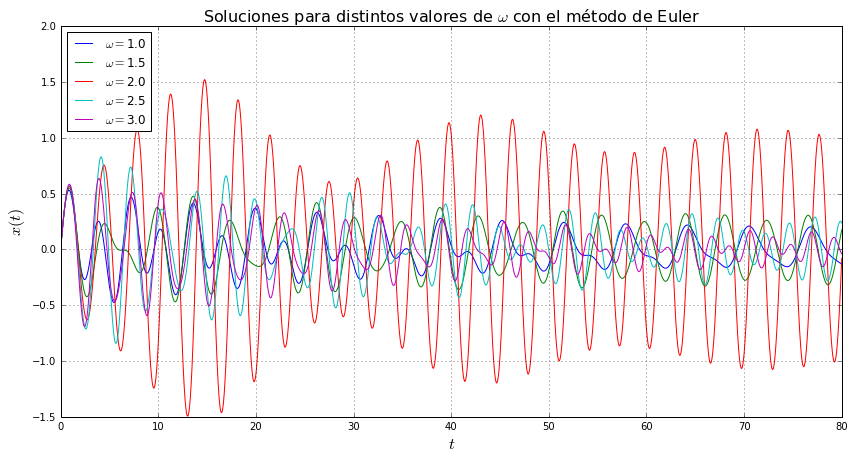

In [19]:
# Se determina el valor maximo del intervalo temporal
Tmax = 80
# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N=5
omega = [1.0 + (3.0-1.0)*i/(N-1) for i in range(N)]

# Se crean arreglos donde se guardaran las soluciones
t_soluciones = []
soluciones = []
for i in range(N):
    # Se calculan las soluciones 
    t_euler_3, sol_euler_3 = euler_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones.append(t_euler_3)
    soluciones.append(sol_euler_3)
# Se grafican las soluciones
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
Visualiza_3("Euler", t_soluciones, soluciones, omega, Tmax, 0.01, 1, ax)

Podemos notar que existen valores de $\omega$ para las cuales se presentan resonancias en la solución por ejemplo para valores cercanos a $\omega = 2$. A continuación se hace un barrido en las frecuencias para valores de $\omega \in [1,3]$, y se calcula y grafica la norma al cuadrado de la solución en $L^2$, $\textit{i.e.}$ $\|f(x)\|^2_{L^2} = \int_0^{T_{max}} f(x)^2 dx$.

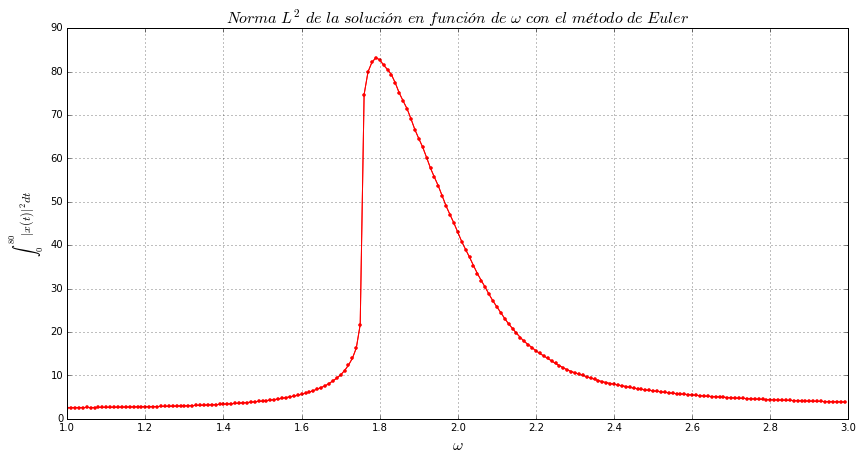

In [20]:
# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N = 200
omega = [1.0+(3.0-1.0)*i/N for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones_euler = []
soluciones_euler = []
for i in range(N):
    # Se calculan las soluciones 
    t_euler_3, sol_euler_3 = euler_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones_euler.append(t_euler_3)
    soluciones_euler.append(sol_euler_3)
# Se grafican la norma al cuadrado de las soluciones
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
Visualiza_3(u"\ con\ el\ método\ de\ Euler", t_soluciones_euler, soluciones_euler, omega, Tmax, 0.01, 0, ax)

Podemos notar claramente el fenómeno de resonancia en la solución de la ecuación diferencial $\ddot x + \frac{1}{10}\dot x + 4 \sin x = \frac{1}{2}\sin \omega t$ para $\omega \approx 1.8$. Notemos que la asimetría de la resonancia es debido al término "$\sin x$" que vuelve la ecuación diferencial no lineal.

### Resolución con el Método de Taylor

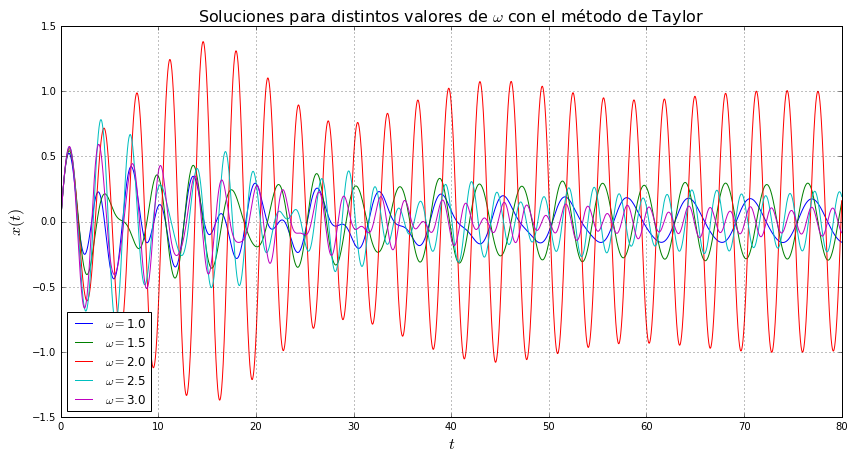

In [21]:
# Se determina el valor maximo del intervalo temporal
Tmax = 80
# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N=5
omega = [1.0 + (3.0-1.0)*i/(N-1) for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones = []
soluciones = []

for i in range(N):
    # Se calculan las soluciones 
    t_taylor_3, sol_taylor_3 = taylor2_args(ecdif3,decdif3,array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones.append(t_taylor_3)
    soluciones.append(sol_taylor_3)
# Se grafican las soluciones
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
Visualiza_3("Taylor", t_soluciones, soluciones, omega, Tmax, 0.01, 1, ax)

Notemos que al igual que con la solución del método de Euler, se presenta un fenómeno de resonancia.

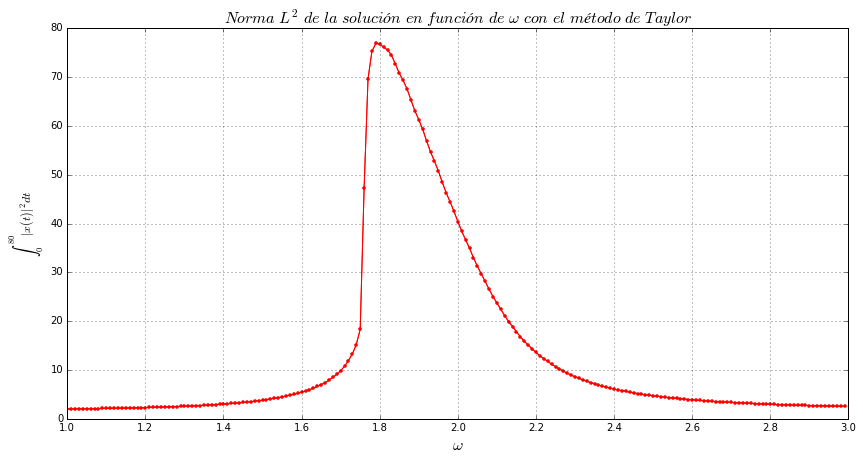

In [22]:
# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N = 200
omega = [1.0+(3.0-1.0)*i/N for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones_taylor = []
soluciones_taylor = []
for i in range(N):
    # Se calculan las soluciones 
    t_taylor_3, sol_taylor_3 = taylor2_args(ecdif3,decdif3,array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones_taylor.append(t_taylor_3)
    soluciones_taylor.append(sol_taylor_3)
# Se grafican la norma al cuadrado de las soluciones
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
Visualiza_3(u"\ con\ el\ método\ de\ Taylor", t_soluciones_taylor, soluciones_taylor, omega, Tmax, 0.01, 0, ax)

### Con el Método de Runge-Kutta de 2º orden

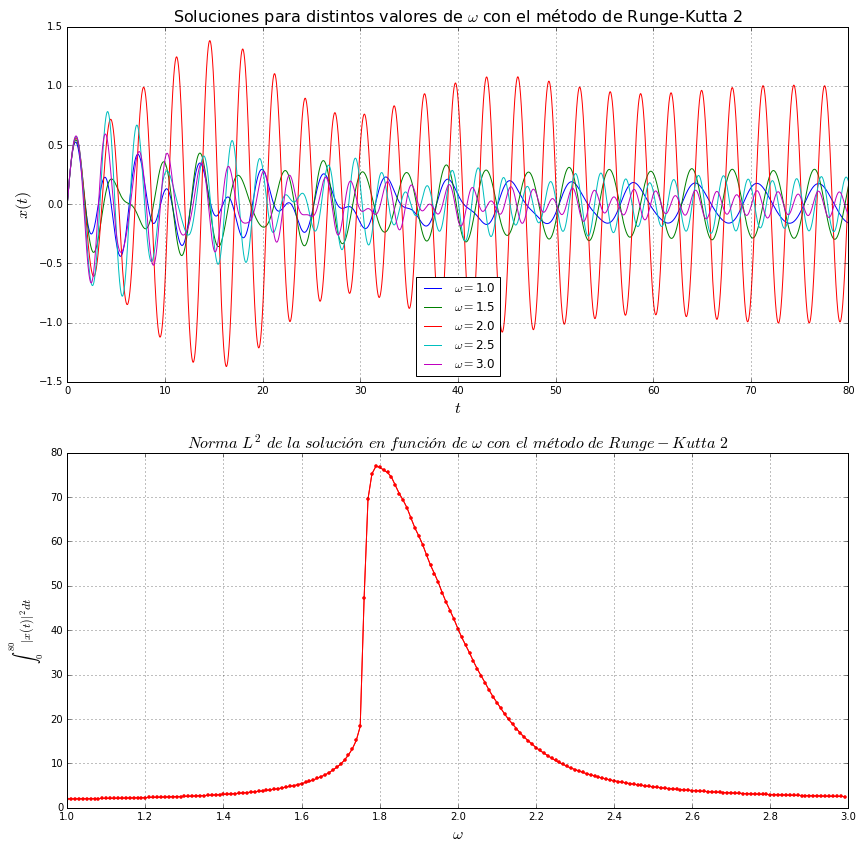

In [23]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(211)
bx = fig.add_subplot(212)

# Se determina el valor maximo del intervalo temporal
Tmax = 80
# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N=5
omega = [1.0 + (3.0-1.0)*i/(N-1) for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones = []
soluciones = []

for i in range(N):
    # Se calculan las soluciones 
    t_rk2_3, sol_rk2_3 = RK2_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones.append(t_rk2_3)
    soluciones.append(sol_rk2_3)
# Se grafican las soluciones
Visualiza_3("Runge-Kutta 2", t_soluciones, soluciones, omega, Tmax, 0.01, 1, ax)

# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N = 200
omega = [1.0+(3.0-1.0)*i/N for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones_rk2 = []
soluciones_rk2 = []
for i in range(N):
    # Se calculan las soluciones 
    t_rk2_3, sol_rk2_3 = RK2_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones_rk2.append(t_rk2_3)
    soluciones_rk2.append(sol_rk2_3)
# Se grafican la norma al cuadrado de las soluciones
Visualiza_3(u"\ con\ el\ método\ de\ Runge-Kutta\ 2", t_soluciones_rk2, soluciones_rk2, omega, Tmax, 0.01, 0, bx)

### Con el Método de Runge-Kutta de 4º orden

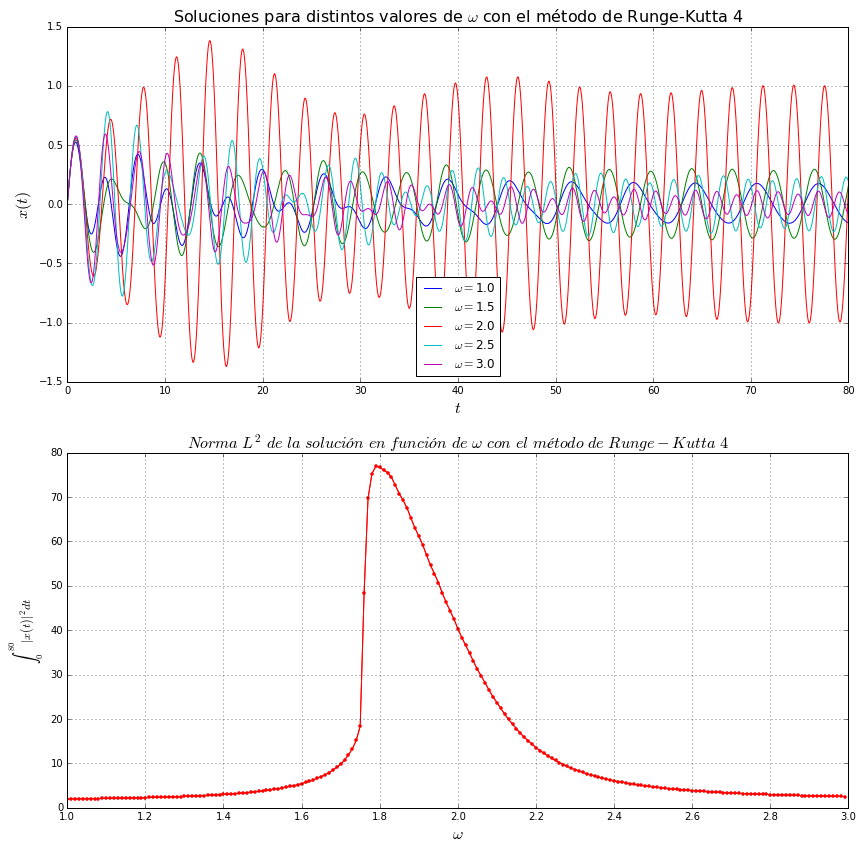

In [24]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(211)
bx = fig.add_subplot(212)

# Se determina el valor maximo del intervalo temporal
Tmax = 80
# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N=5
omega = [1.0 + (3.0-1.0)*i/(N-1) for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones = []
soluciones = []

for i in range(N):
    # Se calculan las soluciones 
    t_rk4_3, sol_rk4_3 = RK4_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones.append(t_rk4_3)
    soluciones.append(sol_rk4_3)
# Se grafican las soluciones
Visualiza_3("Runge-Kutta 4", t_soluciones, soluciones, omega, Tmax, 0.01, 1, ax)

# Se determina el numero de soluciones que se van a pintar, asi como las omega's correspondientes
N = 200
omega = [1.0+(3.0-1.0)*i/N for i in range(N)]
# Se crean arreglos donde se guardaran las soluciones
t_soluciones_rk4 = []
soluciones_rk4 = []
for i in range(N):
    # Se calculan las soluciones 
    t_rk4_3, sol_rk4_3 = RK4_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], 0.01)
    t_soluciones_rk4.append(t_rk4_3)
    soluciones_rk4.append(sol_rk4_3)
# Se grafican la norma al cuadrado de las soluciones
Visualiza_3(u"\ con\ el\ método\ de\ Runge-Kutta\ 4", t_soluciones_rk4, soluciones_rk4, omega, Tmax, 0.01, 0, bx)

Si ahora comparamos las normas de las soluciones podemos ver que

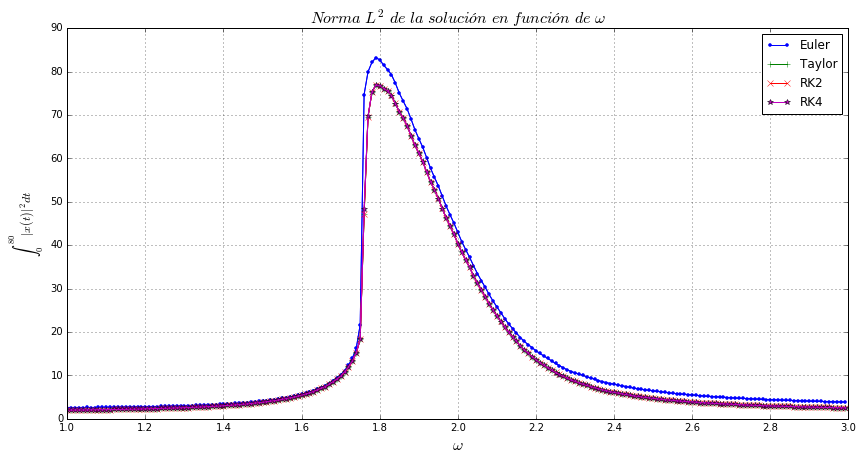

In [25]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
Visualiza_3("", t_soluciones_euler, soluciones_euler, omega, Tmax, 0.01, 0, ax, [1,"Euler",'b','.'])
Visualiza_3("", t_soluciones_taylor, soluciones_taylor, omega, Tmax, 0.01, 0, ax, [1,"Taylor",'g','+'])
Visualiza_3("", t_soluciones_rk2, soluciones_rk2, omega, Tmax, 0.01, 0, ax, [1,"RK2",'r','x'])
Visualiza_3("", t_soluciones_rk4, soluciones_rk4, omega, Tmax, 0.01, 0, ax, [1,"RK4",'m','*'])

Como podemos notar, aunque en todos los métodos de integración se muestra el pico de resonancia alrededor de $\omega \approx 1.8$ y poseen el mismo perfil, no tienen el mismo valor para la norma de las soluciones.

## Ejercicio 4

Consideremos el sistema de ecuaciones diferenciales siguiente

\begin{array}{lcl} 
\frac{dx}{dt} &=& 10(y-x) \\
\frac{dy}{dt} &=& x(28-z)-y \\
\frac{dz}{dt} &=& xy - \frac{8}{3}z
\end{array}

Para realizar la integración se utilizará el método de Runge-Kutta de 4º orden.

In [26]:
# Se define la ecuacion diferencial
def ecdif4(x, t):
    X_prime = 10*(x[1]-x[0])
    Y_prime = x[0]*(28-x[2])-x[1]
    Z_prime = x[0]*x[1]-8.0*x[2]/3.0
    return array([X_prime, Y_prime, Z_prime])

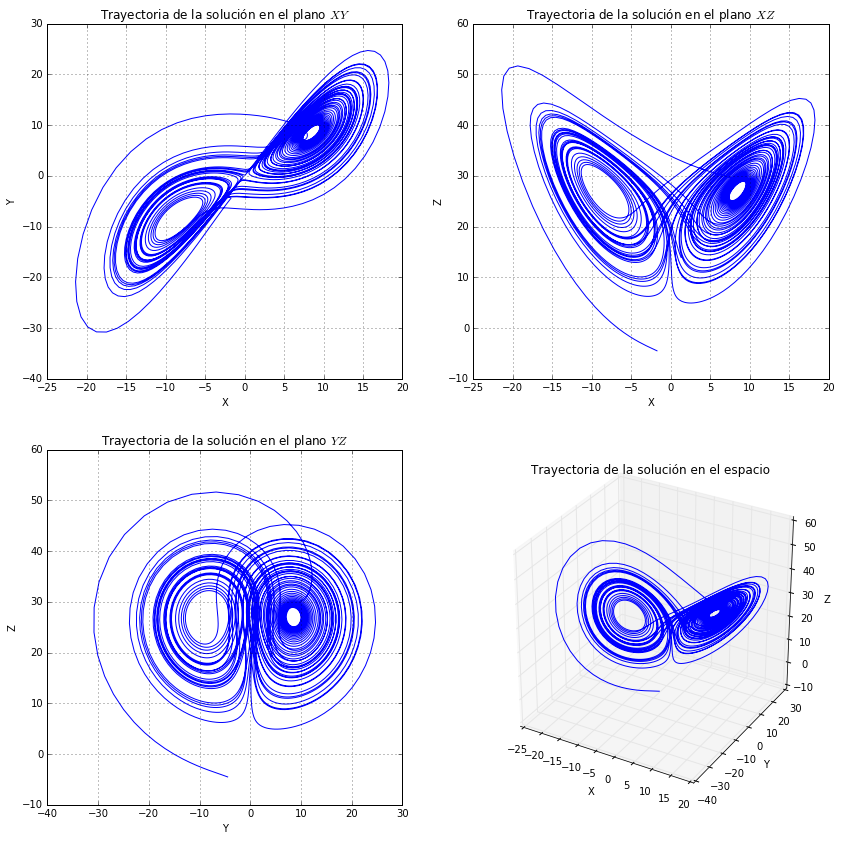

In [27]:
# Se elije una condicion inicial aleatoria para x, y, z en [-5,5]
x0 = (rand()-0.5)*10
y0 = (rand()-0.5)*10
z0 = (rand()-0.5)*10

# Se calcula la solucion para t en [0,50]
t_rk4, sol_rk4 = RK4(ecdif4, array([x0, y0, z0]), [0, 50], 1.0e-2)

# Se crea el ambiente grafico
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224, projection='3d')

# Se crean las graficas en los planos XY, XZ y YZ
ax.plot(sol_rk4[:,0], sol_rk4[:,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title(u"Trayectoria de la solución en el plano $XY$")
ax.grid(True)

bx.plot(sol_rk4[:,0], sol_rk4[:,2])
bx.set_xlabel("X")
bx.set_ylabel("Z")
bx.set_title(u"Trayectoria de la solución en el plano $XZ$")
bx.grid(True)

cx.plot(sol_rk4[:,1], sol_rk4[:,2])
cx.set_xlabel("Y")
cx.set_ylabel("Z")
cx.set_title(u"Trayectoria de la solución en el plano $YZ$")
cx.grid(True)

dx.plot(sol_rk4[:,0], sol_rk4[:,1], sol_rk4[:,2])
dx.set_xlabel("X")
dx.set_ylabel("Y")
dx.set_zlabel("Z")
dx.set_title(u"Trayectoria de la solución en el espacio");

Podemos notar que la solución tiene dos polos atractivos en el espacio, y que la solución se queda dando vueltas alrededor de estos puntos alternando de forma aleatoria el punto sobre el cual quedan orbitando.

Si ahora colocamos 3 condiciones iniciales tales que en la direccion $y$ difieran de $10^{-3}$ y el las demas direcciones sean iguales.

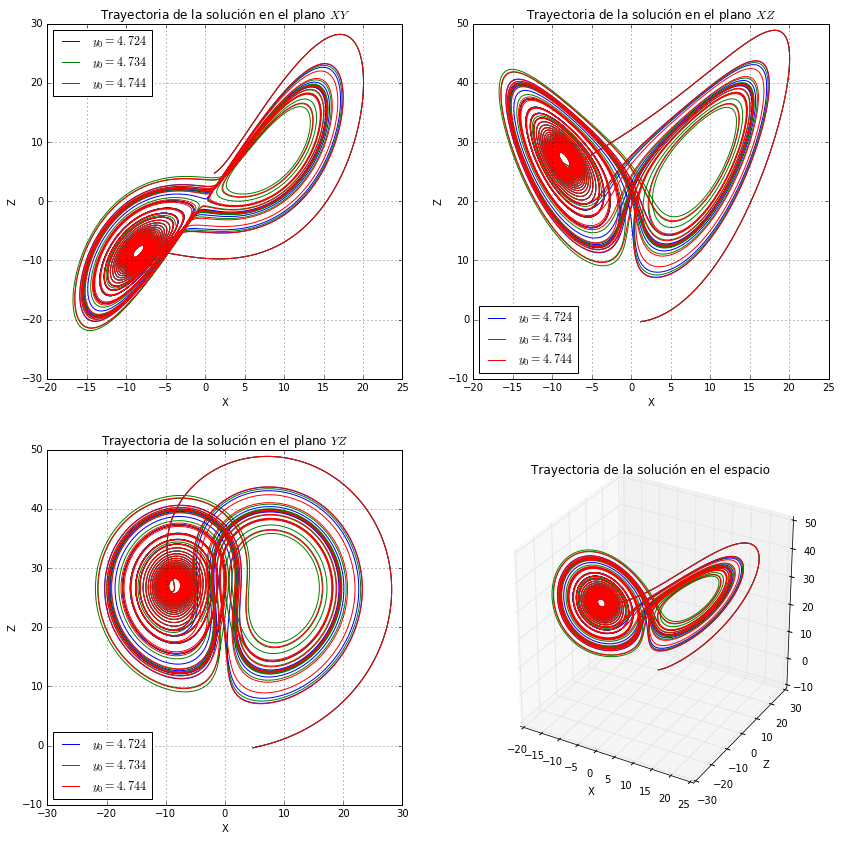

In [28]:
# Se crea el ambiente grafico
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224, projection='3d')

# Se determina una condicion inicial aleatoria
x0 = (rand()-0.5)*10
y0 = (rand()-0.5)*10
z0 = (rand()-0.5)*10

# Se crean las condiciones iniciales de la forma y-0.001, y, y+0.001 y se resuelve el sistema de ecuaciones
for i in arange(-1.1,1.1,1):
    # Se calcula la solucion
    t_rk4, sol_rk4 = RK4(ecdif4, array([x0, y0+0.01*i, z0]), [0, 35], 1.0e-3)
    # Se grafica la solucion
    ax.plot(sol_rk4[:,0], sol_rk4[:,1], label="$y_0="+str(round((y0+0.01*i)*1e3)/1e3)+"$")
    bx.plot(sol_rk4[:,0], sol_rk4[:,2], label="$y_0="+str(round((y0+0.01*i)*1e3)/1e3)+"$")
    cx.plot(sol_rk4[:,1], sol_rk4[:,2], label="$y_0="+str(round((y0+0.01*i)*1e3)/1e3)+"$")
    dx.plot(sol_rk4[:,0], sol_rk4[:,1], sol_rk4[:,2], label="$y_0="+str(round((y0+0.01*i)*1e3)/1e3)+"$")
    
    ax.legend(loc='best')
    bx.legend(loc='best')
    cx.legend(loc='best')
    
ax.grid(True)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_title(u"Trayectoria de la solución en el plano $XY$")

bx.grid(True)
bx.set_xlabel("X")
bx.set_ylabel("Z")
bx.set_title(u"Trayectoria de la solución en el plano $XZ$")

cx.grid(True)
cx.set_xlabel("X")
cx.set_ylabel("Z")
cx.set_title(u"Trayectoria de la solución en el plano $YZ$")

dx.set_xlabel("X")
dx.set_ylabel("Z")
dx.set_title(u"Trayectoria de la solución en el espacio");

Podemos notar que las tres soluciones aunque empiezan con condiciones iniciales muy cercanas las soluciones se separan después de un cierto tiempo $t_c>0$. También, para t "pequeñas", respecto al tiempo total de integración, las soluciones son indistinguibles hasta $t_c$ donde las soluciones se separan y siguen trayectorias diferentes.

Este comportamiento se puede explicar si consideramos que la trayectoria que sigue la solución es caótica.